In [1]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
fe = FeatureExtractor()

In [4]:
# Iterate through images (Change the path based on your image location)
num = 1
imgPath_feature = []
img_path_obj = []
for img_path in Path("/home/lipad/Desktop/CBIR/dataset_small/").glob("*.jpg"):
    print(num,end="\t")
    num +=1
    # Extract Features
    feature = fe.extract(img=Image.open(img_path))
    imgPath_feature.append([img_path,feature])
    
    img_path_obj.append(img_path.name)


1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	

In [7]:
# Insert the image query
img = Image.open("/home/lipad/Desktop/CBIR/dataset_small/4.jpg")

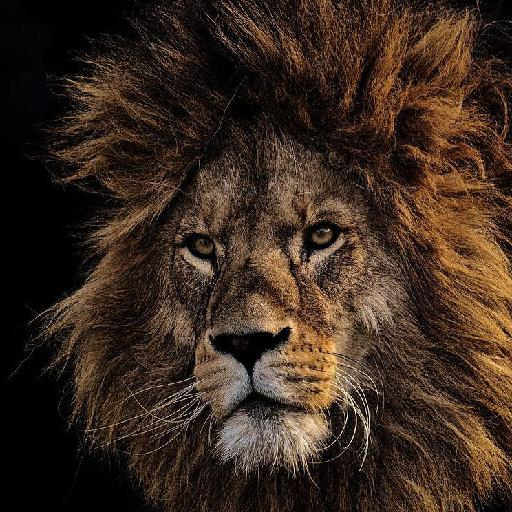

In [8]:
img

In [9]:
# Extract its features
query = fe.extract(img)

In [10]:
distances=[]
for img in imgPath_feature:
    distances.append(np.linalg.norm(img[1] - query))

In [11]:
# Extract 30 images that have lowest distance
ids = np.argsort(distances)[:30]

In [12]:
scores = [(distances[id], imgPath_feature[id]) for id in ids]

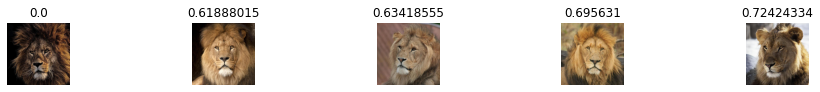

In [15]:
# Visualize the result
axes=[]
fig=plt.figure(figsize=(16,8))
Image1 = Image
for image1 in range(5):
    axes.append(fig.add_subplot(6, 5, image1+1))
    subplot_title=str(scores[image1][0])
    axes[image1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image1.open(scores[image1][1][0]))